In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

# Решим следующую краевую задачу
(XI.9.2(б))
$$
    y''+\frac{0.5}{1-0.5y}y'^2=0 \\
    y(0) = 1.9 \\
    y(1) = 0 
$$

## Решим задачу методом стрельбы

In [71]:
!rm -f task7_1_data/*
!cd comp_math_rs && cargo run --release --bin task7_1

   Compiling comp_math_rs v0.1.0 (/Users/vlad/Documents/VSCode/MiptCompMath/comp_math_rs)
    Finished `release` profile [optimized] target(s) in 0.88s              
     Running `target/release/task7_1`
0, 3.00586629
1, 10.58084809
2, 17.15219911


OSError: [Errno 5] Input/output error

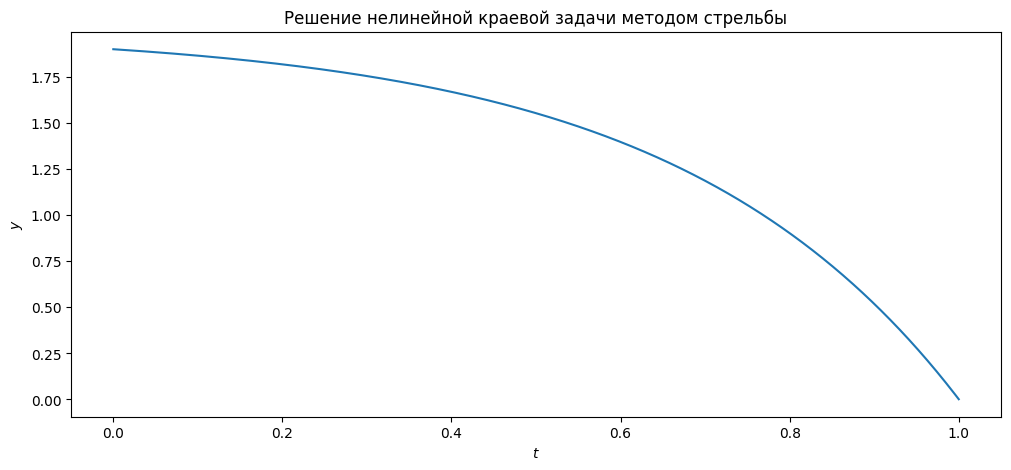

tau: 0.001

execution time: 0.00153397 seconds


In [72]:
with open(f"task7_1_data/shooting_method.csv", "r") as f:
    f.readline()
    tau = f.readline()
    duration = f.readline()
    t = []
    x = []
    for line in f:
        t_i = float(line.split(",")[0])
        x_i = list(map(float, line.split(",")))[1]
        t.append(t_i)
        x.append(x_i)
    
    plt.figure(figsize=(12, 5))
    plt.plot(t, x) 
    plt.xlabel("$t$")
    plt.ylabel("$y$")
    plt.title("Решение нелинейной краевой задачи методом стрельбы")
    plt.show()
    
    print(f"tau: {tau}")
    print(f"execution time: {duration.strip()} seconds")


## Решим задачу методом квазилинеаризации Ньютона

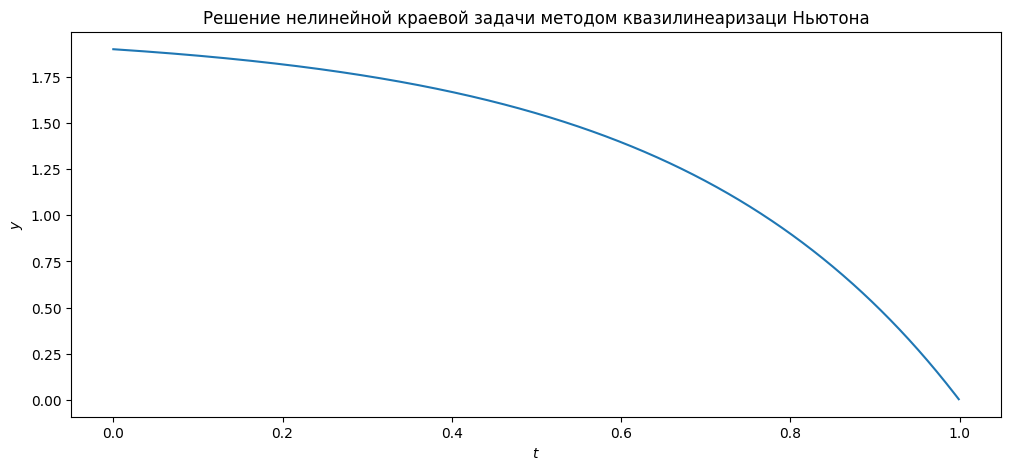

tau: 0.001

execution time: 0.00576131 seconds


In [ ]:
with open(f"task7_1_data/newton_method.csv", "r") as f:
    f.readline()
    tau = f.readline()
    duration = f.readline()
    t = []
    x = []
    for line in f:
        t_i = float(line.split(",")[0])
        x_i = list(map(float, line.split(",")))[1]
        t.append(t_i)
        x.append(x_i)
    
    plt.figure(figsize=(12, 5))
    plt.plot(t, x) 
    plt.xlabel("$t$")
    plt.ylabel("$y$")
    plt.title("Решение нелинейной краевой задачи методом квазилинеаризаци Ньютона")
    plt.show()
    
    print(f"tau: {tau}")
    print(f"execution time: {duration.strip()} seconds")
